In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# A

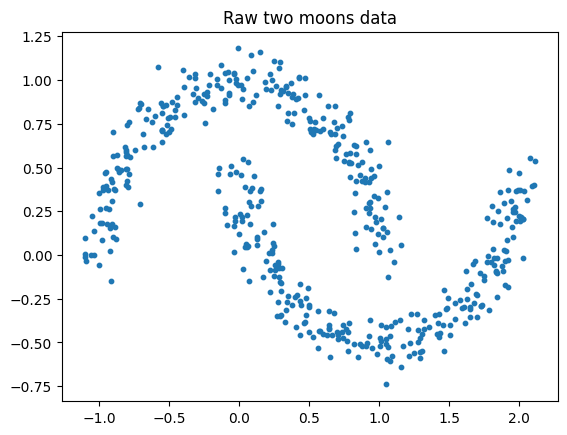

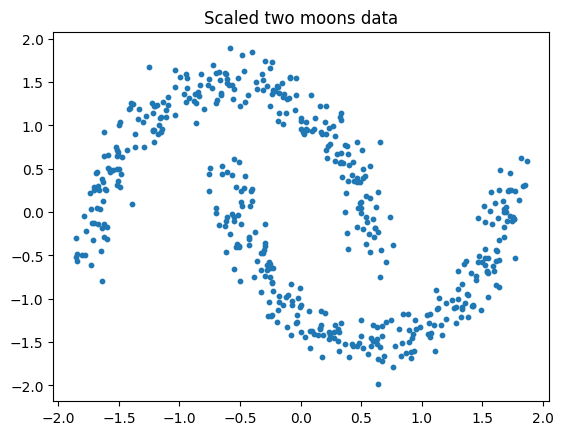

In [2]:
X, y_true = make_moons(n_samples=500, noise=0.08, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Raw two moons data")
plt.show()

scaler2 = StandardScaler()
X_scaled2 = scaler2.fit_transform(X)

plt.scatter(X_scaled2[:, 0], X_scaled2[:, 1], s=10)
plt.title("Scaled two moons data")
plt.show()


# B

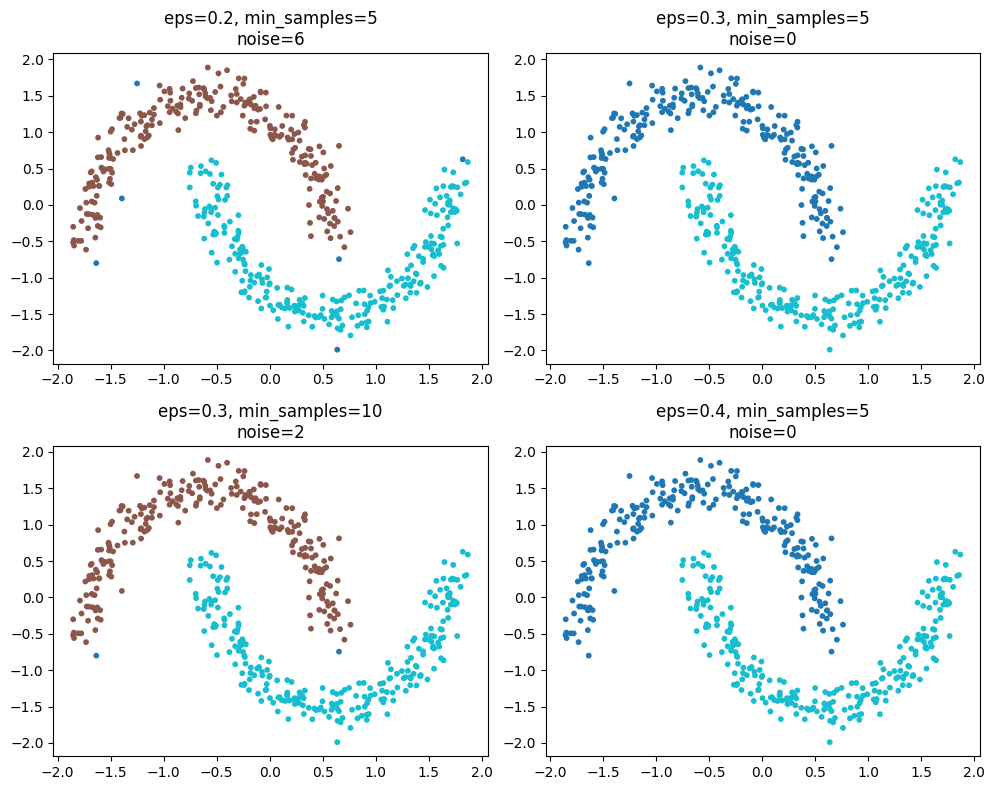

In [3]:
params = [
    (0.2, 5),
    (0.3, 5),
    (0.3, 10),
    (0.4, 5),
]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

for ax, (eps, ms) in zip(axes, params):
    db = DBSCAN(eps=eps, min_samples=ms)
    labels_db = db.fit_predict(X_scaled2)
    n_noise = np.sum(labels_db == -1)

    scatter = ax.scatter(
        X_scaled2[:, 0],
        X_scaled2[:, 1],
        c=labels_db,
        cmap="tab10",
        s=10,
    )
    ax.set_title(f"eps={eps}, min_samples={ms}\nnoise={n_noise}")

plt.tight_layout()
plt.show()


# G

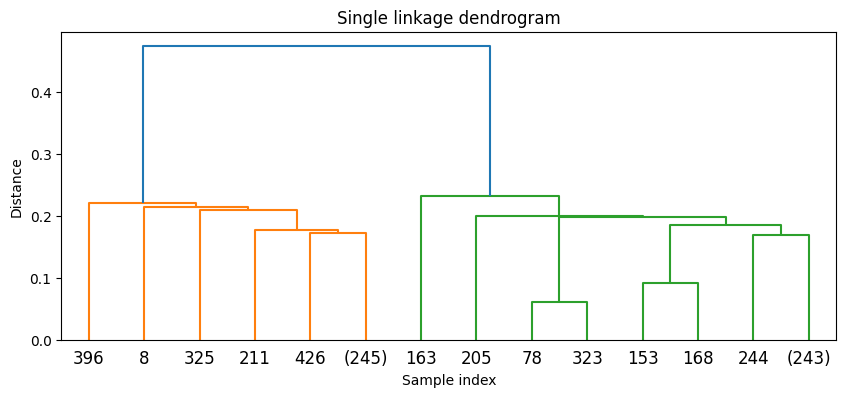

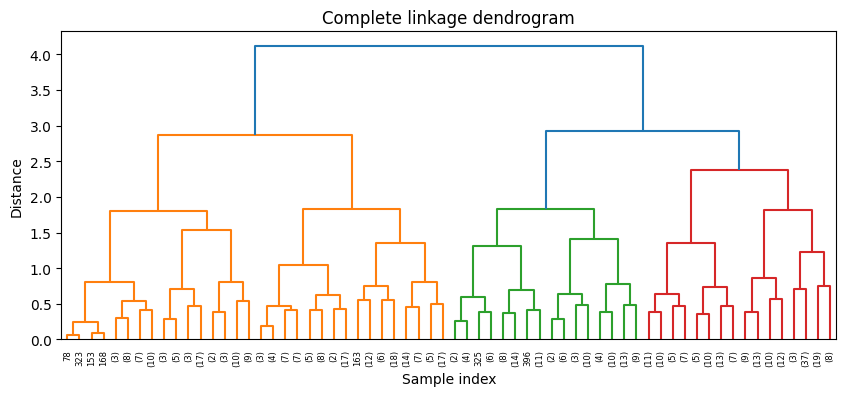

In [4]:
Z_single = linkage(X_scaled2, method="single")  # کمترین فاصله بین دو اعضای دو خوشه! زنجیره ای
Z_complete = linkage(X_scaled2, method="complete")  # بیشترین فاصله بین اعضای دو خوشه فشرده تر و متعاپلتر

plt.figure(figsize=(10, 4))
plt.title("Single linkage dendrogram")
dendrogram(Z_single, truncate_mode="level", p=5)
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

plt.figure(figsize=(10, 4))
plt.title("Complete linkage dendrogram")
dendrogram(Z_complete, truncate_mode="level", p=5)
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


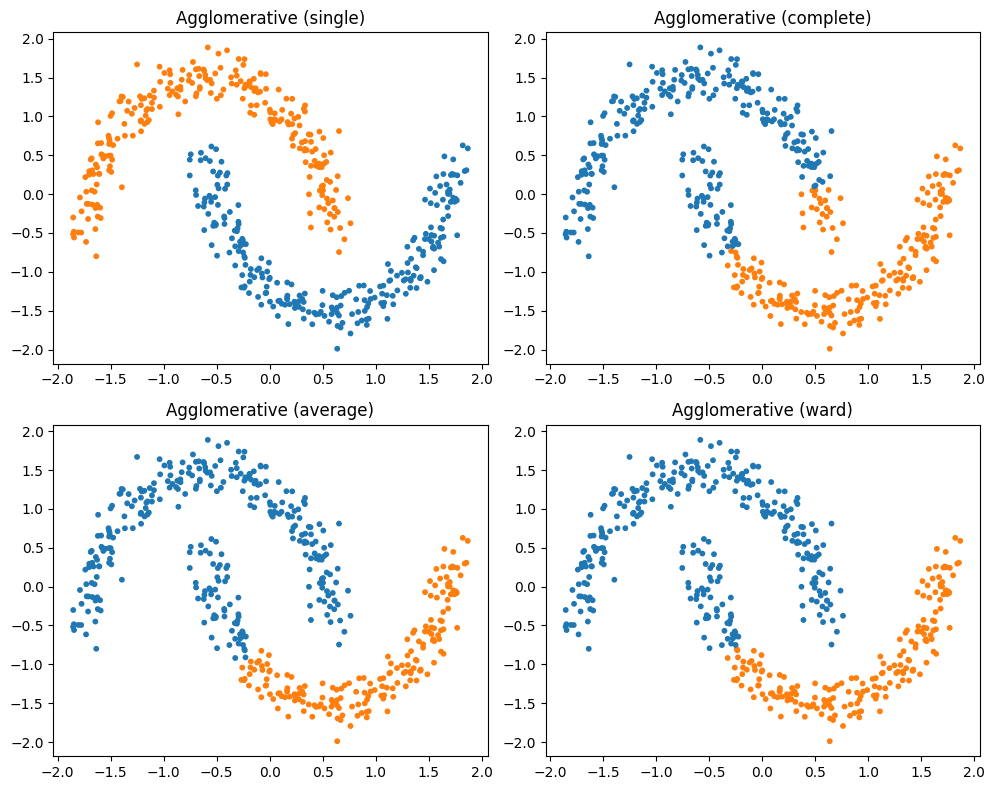

In [5]:
linkages = ["single", "complete", "average", "ward"]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

colors = np.array(["tab:blue", "tab:orange"])

for ax, lk in zip(axes, linkages):
    agg = AgglomerativeClustering(n_clusters=2, linkage=lk)
    labels_agg = agg.fit_predict(X_scaled2)
    ax.scatter(
        X_scaled2[:, 0],
        X_scaled2[:, 1],
        c=colors[labels_agg],
        s=10,
    )
    ax.set_title(f"Agglomerative ({lk})")

plt.tight_layout()
plt.show()
